# Inferential Statistics Ia - Frequentism

## Learning objectives

Welcome to the first Frequentist inference mini-project! Over the course of working on this mini-project and the next frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [2]:

?norm


A:Probability Density Function or PDF

Q: Use the method that generates random variates to draw five samples from the standard normal distribution.

A: norm.rvs

In [5]:
seed(47)
# draw five samples here
rv= norm.rvs(size=5)
print(rv)


[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

The mean is 0.19. No, it is not equal to 0 as 0 is mean of a standard normal distribution.

In [6]:
# Calculate and print the mean here, hint: use np.mean()
m = np.mean(rv)
print(m)


0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

A:The Standard Deviation is .96

In [7]:
sd = np.sqrt(np.sum((rv-m)*(rv-m))/len(rv))
print(sd)

0.9606195639478641


Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

A:1.07

In [8]:
sd_pop = np.sqrt(np.sum((rv-m)*(rv-m))/(len(rv)-1))
print(sd_pop)

1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

A: Numpy's STD returned the SD from our samples

In [9]:
sd_np = np.std(rv)
print(sd_np)

0.9606195639478641


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

A. The keyword arguement which is "ddof" (degrees of freedom) need to be specified to get the Bessel correction in the std.

In [10]:
sd_pop_np = np.std(rv, ddof=1)
print(sd_pop_np)

1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your data set _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting at this point if your sample is your population then you know absolutely everything about your population, there are no probabilities really to calculate and no inference to be done.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population and the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

You're now firmly in frequentist theory territory. Great work so far! Now let's dive deeper.

## II Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as $n$ increases. For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [15]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

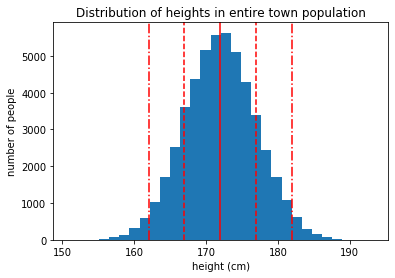

In [16]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [14]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [17]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

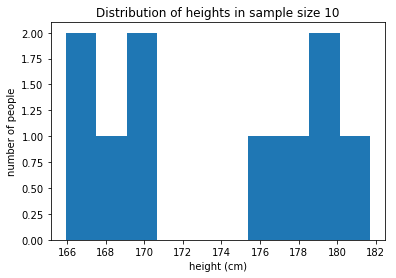

In [8]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [18]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [19]:
daily_sample2 = townsfolk_sampler(10)

In [20]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

A: The simulation is done for 365 days of the year and the mean is stored in a list 'm'. This mean gets plotted on a histogram where the mean of the entire list is then calculated.

In [22]:
seed(47)
# take your samples here
m = []
for i in range(365):
    s = townsfolk_sampler(10)
    m.append(np.mean(s))

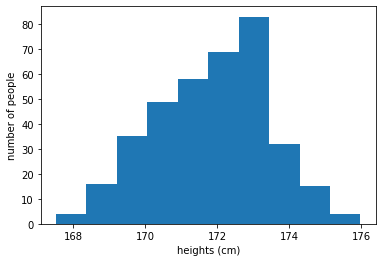

In [23]:
_ = plt.hist(m)
_ = plt.xlabel('heights (cm)')
_ = plt.ylabel('number of people')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

A: The expected mean of the distribution, 171.86 is nearly equal to the population mean 172. The standard deviation of the distribution, 1.575 is also nearly equal to the calculated 1.58

In [24]:
mean_samp_dist = np.mean(m)
print(mean_samp_dist)

171.8660049358649


In [25]:
std_samp_dist = np.std(m)
std_clt = 5/np.sqrt(10)
print(std_samp_dist)
print(std_clt)

1.5756704135286475
1.5811388300841895


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

A: The larger sample makes the distribution narrower and the approximates for the population mean are improved.

In [27]:
seed(47)
# calculate daily means from the larger sample size here
m_large = []
for i in range(365):
    s = townsfolk_sampler(50)
    m_large.append(np.mean(s))

In [28]:
mean_large_samp_dist = np.mean(m_large)
print(mean_large_samp_dist)

std_large_samp_dist = np.std(m_large)
std_large_clt = 5/np.sqrt(50)
print(std_large_samp_dist)
print(std_large_clt)

171.94366080916114
0.6736107539771146
0.7071067811865475


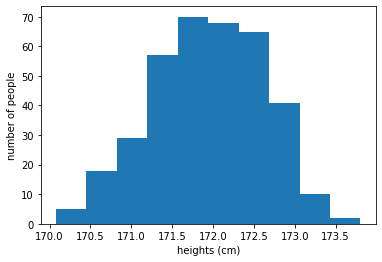

In [29]:
_ = plt.hist(m_large)
_ = plt.xlabel('heights (cm)')
_ = plt.ylabel('number of people')

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### III Normally testing times!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but you still have to estimate them somehow. If we want to make inferences such as "is this observation unusual?" or "has my population mean changed?" then you need to have some idea of what the underlying distribution is so you can calculate relevant probabilities. In frequentist inference, you use the formulas above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

A:0.841

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

A:  When I used the cdf() I got the same answer.

In [30]:
print(norm.cdf(1))

0.8413447460685429


__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

A: The mean of our population is 172 and its std is 5.  177 is one std above this mean. So using the normal curve, the probability of selecting 1 person with a height of 177 or less is 0.841

In [31]:
print(1-norm.cdf(5.6))

1.0717590259723409e-08


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

A: 2 m is 6.5616798 Ft which is 200 cms. This represents more than 28 cms more than our population mean of 172 cm and is 28/5=5.6 std far from the mean. The probability of seeing a person of this 2 m height is norm.cdf(5.6). Hence seeing a person who is 2 m is 1-norm.cdf(5.6) which is very very low.

 Q: Let's now start from the position of knowing nothing about the heights of people in our town.

Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
Estimate the population mean using np.mean
Estimate the population standard deviation using np.std (remember which denominator to use!)
Calculate the (95%) margin of error (use the exact critial z value to 2 decimal places - look this up or use norm.ppf())
Calculate the 95% Confidence Interval of the mean

Q: Does this interval include the true population mean?
A: As you can see in the code below it includes the true population mean.

In [32]:
seed(47)
# take your sample now
sample = townsfolk_sampler(50)

In [37]:
# estimating the population mean
pop_mean = round(np.mean(sample), 2)
print(pop_mean)

172.78


In [33]:
# estimating the population std with Bessel correction
pop_std = round(np.std(sample, ddof=1), 2)
print(pop_std)

4.2


In [34]:
# 95% confidence interval is calculated from the z table as 1.96 or as follows

alpha = 1-.95  
#alpha or the difference are calculated
A2 = alpha/2
# divided by 2 for the 2 sides
area = 1-A2                 
z = norm.ppf(area)  
# gives critical value for 95% confidence interval
print(round(z, 2))

1.96


In [39]:
# calculated the margin of error by multiplying the z score to the standard error as we have only the sample. 
# Standard error is std/sqrt of sample size

margin_of_error = round(z,2) * pop_std/np.sqrt(50)
print(margin_of_error)

1.1641806045455316


In [40]:
# the 95% confidence interval will have the following heights as their lower and higher limit
print(pop_mean - margin_of_error, pop_mean + margin_of_error)

171.61581939545448 173.94418060454552


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

A: We assume our sample is a good representation of our town's population along with the sample's SD. Rather we should look at the actual population and its standard deviation, we use unbiased standard deviation of our sample.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

A: The mean t dist of the 95% confidence interval is slightly wider than the interval with the z statistic.

In [ ]:
seed(47)
# calculate sample
sample_t = townsfolk_sampler(50)

In [50]:
# estimating the population mean
pop_mean_t = round(np.mean(sample_t), 2)
print(pop_mean_t)

172.78


In [51]:
# estimating the population std with Bessel correction
pop_std_t = round(np.std(sample_t, ddof=1), 2)
print(pop_std_t)

4.2


In [45]:
# 95% confidence interval is calculated from the t table after getting the alpha/2 + degrees of freedom

alpha_t = 1-.95                       # alpha or the difference are calculated
alpha_2_t = alpha/2                 # divide alpha by 2 
area_t = 1-alpha_2_t                # area under 95% interval
df = len(sample_t)-1                  # degrees of freedom is length of sample-1
t_stat = t.ppf(area_t, df)
print(t_stat)
print(df)

2.009575234489209
49


In [48]:
# calculate the margin of error by multiplying the z score to the standard error as we have only the sample. 
# the standard error is calculated by dividing the standard dev by the square root

margin_of_error_t = t_stat * pop_std_t/np.sqrt(50)
print(margin_of_error_t)

1.1936267915139676


In [52]:
# the 95% confidence interval will have the heights below as their lower and higher limit
print(pop_mean_t - margin_of_error_t, pop_mean_t + margin_of_error_t)

171.58637320848604 173.97362679151396


This confidence level is wider that our previous CL which means that we are have increased uncertainty of accuracy as we are estimating confidence levels from a population sample